In [1]:
#import packages
library(BoolNet)

In [3]:
network <- loadNetwork("indirect_edges_naturally_off.txt")

In [4]:
network

Boolean network with 7 genes

Involved genes:
ANAC032 NIR1 NLP6 NLP7 ARF18 ANR1 DREB26

Transition functions:
ANAC032 = (! ARF18 & ! ANR1 & ! DREB26)
NIR1 = (NLP7 | NLP6) & (! ANAC032 & ! ARF18 & ! ANR1 & ! DREB26)
NLP6 = (! DREB26 & ! ARF18) & (NLP7 | NLP6 | ANR1)
NLP7 = (! ANAC032 & ! DREB26 & ! ARF18) & (NLP6 | NLP7 | ANR1)
ARF18 = (! ARF18 & ! DREB26) & (NLP6 | NLP7)
ANR1 = (NLP7 | NLP6) & (! ARF18 & ! ANR1 & ! DREB26)
DREB26 = (! ARF18 & ! ANAC032) & (NLP6 | NLP7 | DREB26 | ANR1)

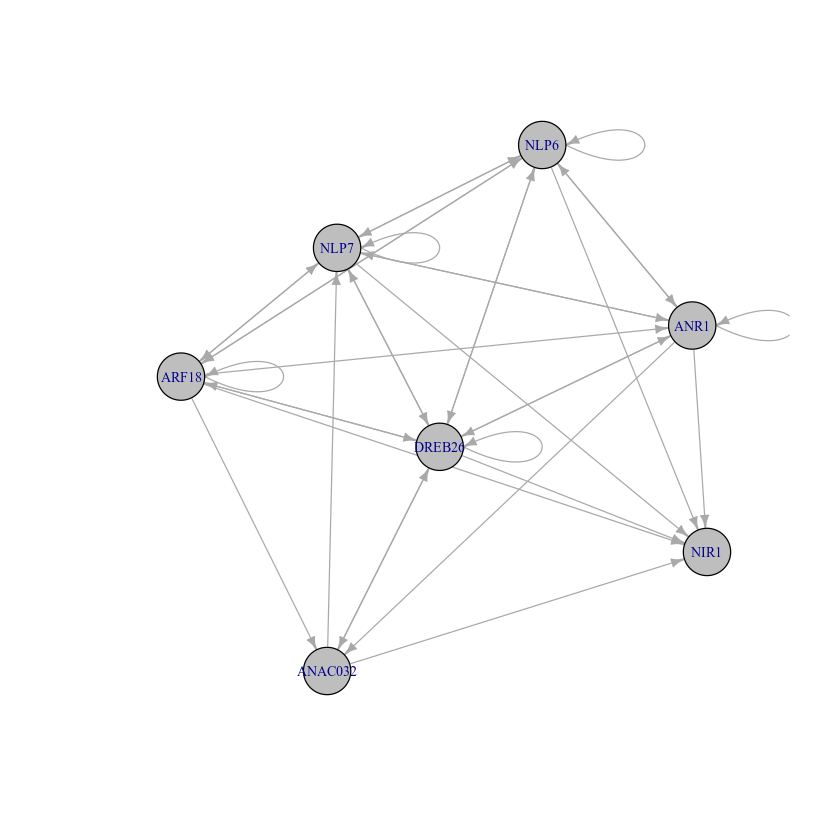

In [5]:
plotNetworkWiring(network)

In [6]:
#generate time series with artificial knockouts and overexpressions
series <- generateTimeSeries(network, numSeries=100, numMeasurements=100, perturbations=1, noiseLevel=0.1)

In [7]:
series

,1,2,3,4,5,6,7,8,9,10,⋯,91,92,93,94,95,96,97,98,99,100
ANAC032,0.996333655,0.001743064,1.1348689,-0.01343672,0.9470922,0.21810665,0.8877769,-0.07556558,0.9740750,-0.031475836,⋯,1.0130120,0.03992106,0.8474997,0.090303004,0.9414064,-0.05690445,1.1062707,0.14146143,1.0176498,-0.005084130
NIR1,-0.066817071,0.049166574,0.7990866,-0.00479675,0.9125887,0.13387440,1.1819199,0.09264890,0.9479220,-0.137589115,⋯,0.9956266,-0.05568302,1.1168512,0.015854837,1.0224846,-0.05316100,0.9836807,-0.13037054,0.9796587,0.074585848
NLP6,-0.056892840,-0.144818480,1.1020324,-0.07537349,1.0313415,0.13396743,0.9831306,-0.13181095,0.7429273,-0.033217675,⋯,0.7413075,0.06139341,1.1772082,-0.007165605,0.8893971,-0.02247005,1.0717022,0.03381244,1.0153400,0.063577442
NLP7,0.933058422,0.885660568,0.9361076,0.97153422,0.8244762,0.98061341,0.9923145,0.92002137,0.9785904,0.893121208,⋯,0.9819450,1.03869482,1.1190252,0.964770874,1.0353638,0.75271197,1.0314101,1.01033870,1.0632298,1.044854507
ARF18,0.003043205,0.159761876,0.8679819,0.09459653,0.9563637,0.05349556,1.0559389,0.05762647,1.0679678,0.049747747,⋯,0.9067584,-0.06940617,0.9329433,0.011425557,0.8793190,-0.02419700,1.0775399,-0.07938046,1.0153458,-0.048318209
ANR1,0.129499299,0.012005260,0.9552004,-0.08555807,0.9060103,0.14473491,0.8865948,-0.08381412,1.1616890,0.075982217,⋯,0.9231431,0.15252409,1.0363179,0.045614282,0.9600440,-0.01525221,0.8871441,-0.08580945,1.2221144,0.002341879
DREB26,0.931486859,0.123296040,1.0643953,0.02409631,1.0276494,-0.02034655,1.1533264,-0.11127340,0.8288614,-0.005760774,⋯,0.8827802,0.08759820,1.1474977,-0.034972486,1.0280082,-0.03404205,0.7878990,0.04612629,0.9222948,-0.054912142
,1,2,3,4,5,6,7,8,9,10,⋯,91,92,93,94,95,96,97,98,99,100
ANAC032,1.00813705,-0.174723725,0.09050748,0.01992908,0.03399189,-0.09766683,-0.04569131,0.04743951,-0.030574802,-0.02515854,⋯,0.069770933,-0.11709431,-0.14710179,-0.0293476296,0.06116043,0.1435022497,0.169821727,0.03752795,0.04255552,-0.07619917
NIR1,-0.12310114,0.018958207,-0.14519276,0.03739132,-0.17373791,0.12410481,-0.02609168,0.02203042,-0.004515872,0.01803298,⋯,0.096066522,-0.05687507,-0.13181231,-0.0958740911,0.05677953,0.0002196042,0.007602140,0.11162539,-0.08804359,-0.09381016


In [13]:
#simulate state transitions
stateTransition(network, rep(1,7))

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      1       1       1       1       1       0       1

In [35]:
#create start state 10mM nitrate
startState_repleteN <- generateState(network, specs=c("NLP7"=1,)

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: #create start state 10mM nitrate
2: startState_repleteN <- generateState(network, specs=c("NLP7"=1,)
  ^


In [36]:
#generate state transitions based on start state
stateTransition(network, startState_repleteN)

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      1       1       1       1       1       1       1

,1,2,3,4
DREB26,0,1,0,0
ANR1,0,1,0,0
ARF18,0,1,0,0
NLP7,1,1,0,0
NLP6,0,1,0,0
NIR1,0,1,0,0
ANAC032,0,1,0,1


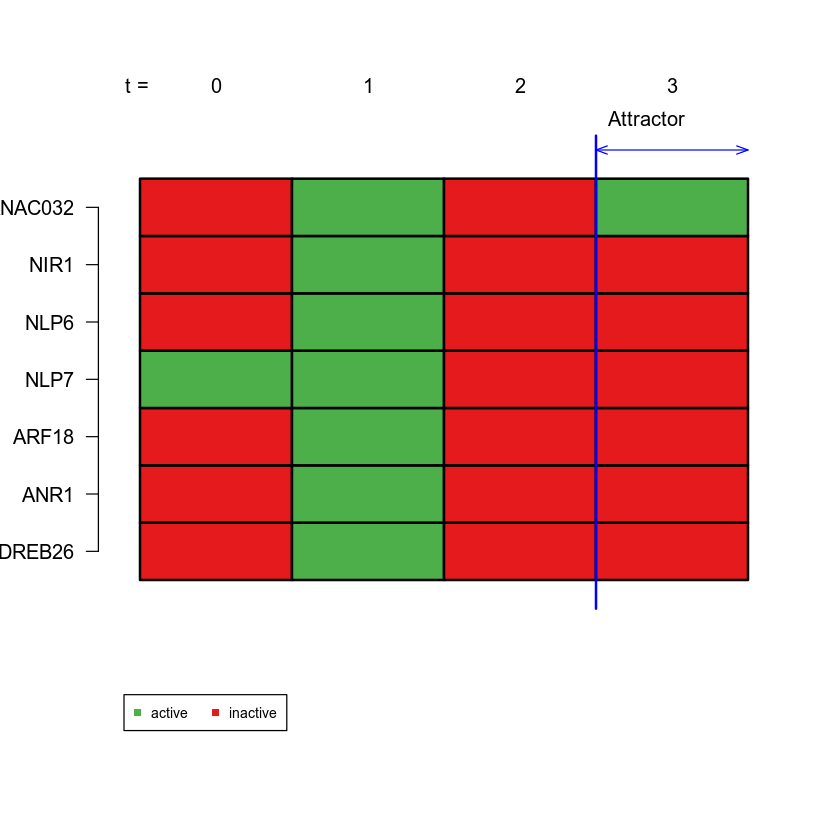

In [37]:
plotSequence(network=network, startState=startState_repleteN)

In [14]:
#calculate all state transitions until an attractor is reached
path <- getPathToAttractor(network, rep(1,7))

In [15]:
path

ANAC032,NIR1,NLP6,NLP7,ARF18,ANR1,DREB26
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,1,1
0,0,0,0,0,0,0
1,0,0,0,0,0,0


,1,2,3
DREB26,1,0,0
ANR1,1,0,0
ARF18,1,0,0
NLP7,1,0,0
NLP6,1,0,0
NIR1,1,0,0
ANAC032,1,0,1


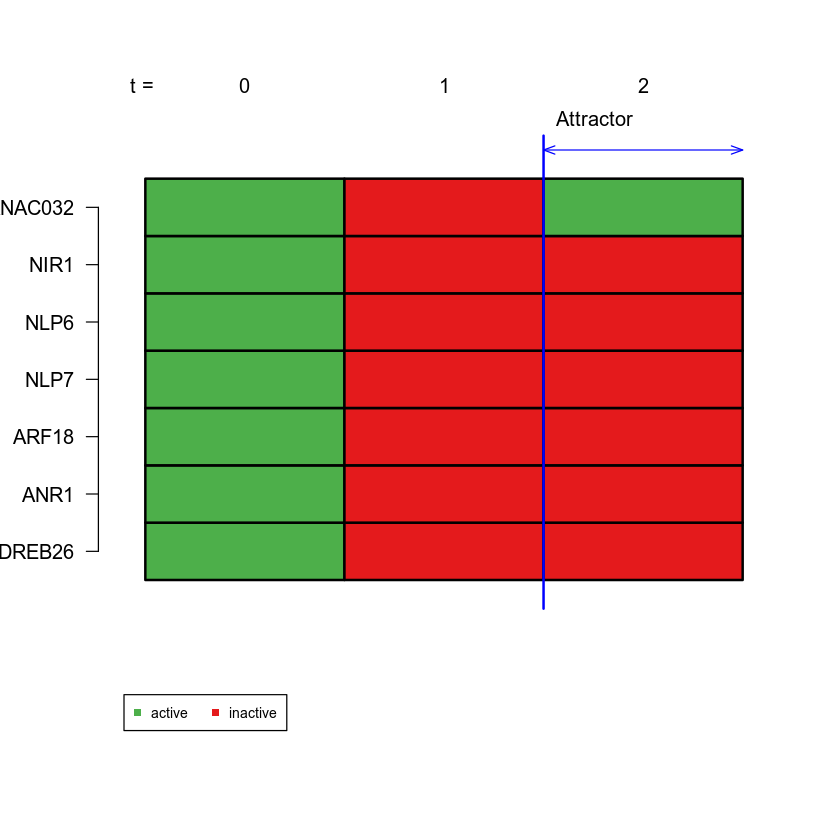

In [16]:
#plot this sequence
plotSequence(sequence=path)

In [12]:
#create LaTeX table file
sequenceToLaTeX(sequence=path, file="indirect_sequence.tex")

,1,2,3
ANAC032,1,0,1
NIR1,1,0,0
NLP6,1,0,0
NLP7,1,0,0
ARF18,1,0,0
ANR1,1,0,0
DREB26,1,0,0
